In [1]:
import pandas as pd
import numpy as np

In [2]:
sales_train_val = pd.read_csv('sales_train_validation.csv')
sales_train_val.info

<bound method DataFrame.info of                                   id        item_id    dept_id   cat_id  \
0      HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1      HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2      HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3      HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4      HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                              ...            ...        ...      ...   
30485    FOODS_3_823_WI_3_validation    FOODS_3_823    FOODS_3    FOODS   
30486    FOODS_3_824_WI_3_validation    FOODS_3_824    FOODS_3    FOODS   
30487    FOODS_3_825_WI_3_validation    FOODS_3_825    FOODS_3    FOODS   
30488    FOODS_3_826_WI_3_validation    FOODS_3_826    FOODS_3    FOODS   
30489    FOODS_3_827_WI_3_validation    FOODS_3_827    FOODS_3    FOODS   

      store_id state_id  d_1  d_2  d_3  d_4  ...  d_1904  d_1905  d

In [3]:
sell_prices = pd.read_csv('sell_prices.csv')
sell_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
store_id      object
item_id       object
wm_yr_wk      int64
sell_price    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


In [4]:
sell_prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [5]:
calendar = pd.read_csv('calendar.csv')
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
date            1969 non-null object
wm_yr_wk        1969 non-null int64
weekday         1969 non-null object
wday            1969 non-null int64
month           1969 non-null int64
year            1969 non-null int64
d               1969 non-null object
event_name_1    162 non-null object
event_type_1    162 non-null object
event_name_2    5 non-null object
event_type_2    5 non-null object
snap_CA         1969 non-null int64
snap_TX         1969 non-null int64
snap_WI         1969 non-null int64
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In [6]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [7]:
calendar['date'] = pd.to_datetime(calendar['date'])

for col in ['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']:
    calendar[col].fillna('unknown', inplace=True)

In [8]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
date            1969 non-null datetime64[ns]
wm_yr_wk        1969 non-null int64
weekday         1969 non-null object
wday            1969 non-null int64
month           1969 non-null int64
year            1969 non-null int64
d               1969 non-null object
event_name_1    1969 non-null object
event_type_1    1969 non-null object
event_name_2    1969 non-null object
event_type_2    1969 non-null object
snap_CA         1969 non-null int64
snap_TX         1969 non-null int64
snap_WI         1969 non-null int64
dtypes: datetime64[ns](1), int64(7), object(6)
memory usage: 215.5+ KB


In [9]:
calendar.head(2)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,unknown,unknown,unknown,unknown,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,unknown,unknown,unknown,unknown,0,0,0


In [10]:
total_sale = []
for i in sales_train_val.index:
    total_sale.append(sales_train_val.loc[i]['d_1':].sum())
sales_train_val['total_sale'] = total_sale

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

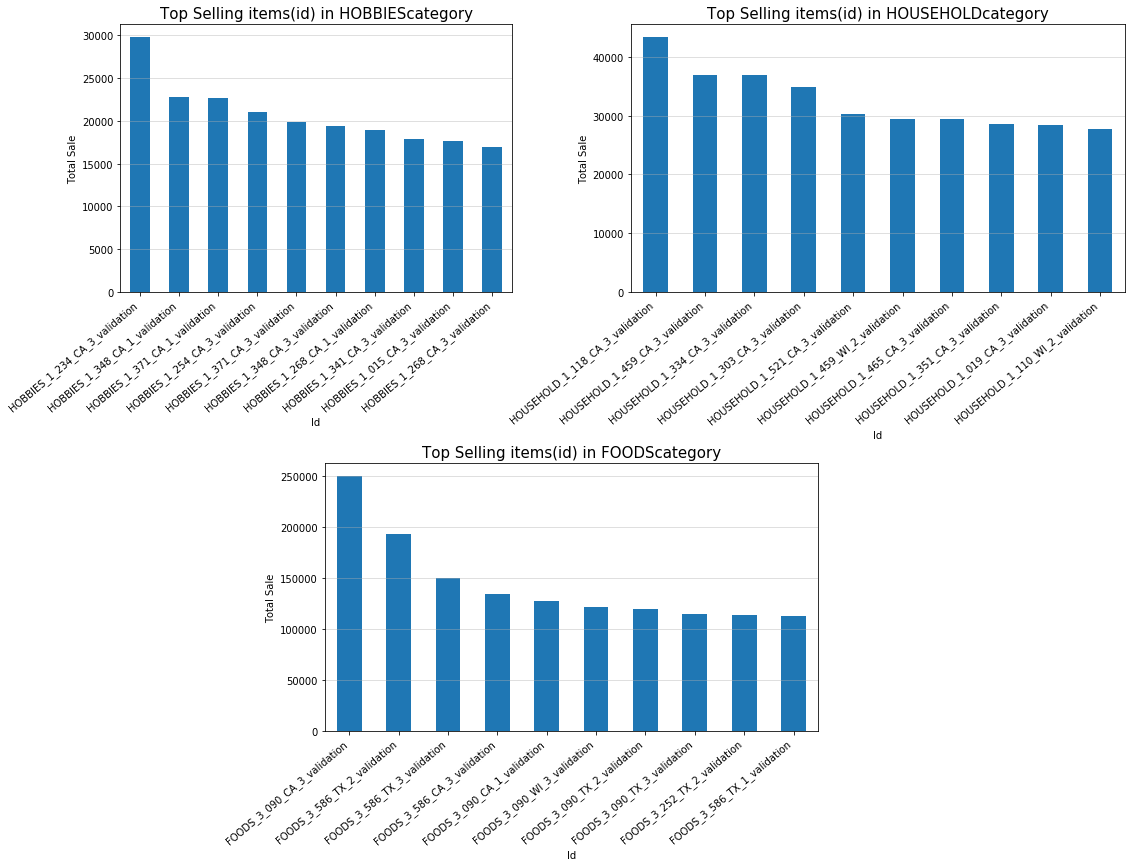

In [12]:
#Category
fig = plt.figure(figsize=(18,13))
gs = fig.add_gridspec(5,10)
ax1 = fig.add_subplot(gs[0:2, :4])
ax2 = fig.add_subplot(gs[0:2, 5:])
ax3 = fig.add_subplot(gs[3:5, 2:7])

for cat, ax in zip(sales_train_val['cat_id'].unique(), [ax1, ax2, ax3]):
    sales_train_val[sales_train_val['cat_id'] == cat]\
                .sort_values(by='total_sale', ascending=False)[:10]\
                .plot(x='id', y='total_sale', kind='bar', legend=False, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
    ax.set_title('Top Selling items(id) in ' + cat +'category', fontsize=15)
    ax.grid(axis='y', alpha=0.5)
    ax.set_xlabel('Id')
    ax.set_ylabel('Total Sale')
plt.show()

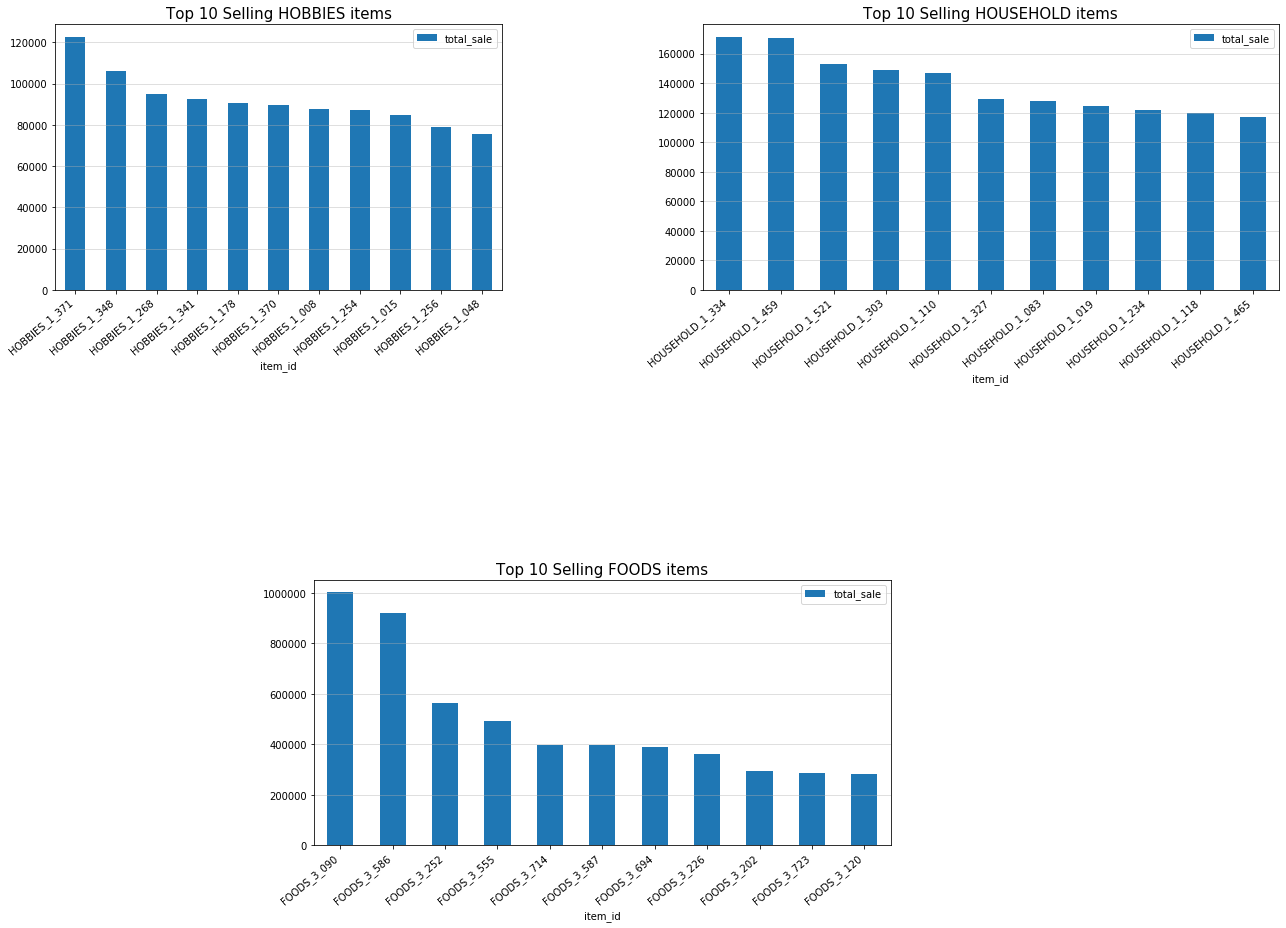

In [13]:
# item
fig = plt.figure(figsize=(18,13))
gs = fig.add_gridspec(5,10)
ax1 = fig.add_subplot(gs[0:2, :4])
ax2 = fig.add_subplot(gs[0:2, 5:])
ax3 = fig.add_subplot(gs[3:5, 2:7])

for cat, ax in zip(sales_train_val['cat_id'].unique(), [ax1, ax2, ax3]):
    sales_train_val[sales_train_val['cat_id'] == cat][['item_id', 'total_sale']]\
                                                .groupby('item_id')\
                                                .sum()\
                                                .sort_values(by='total_sale', ascending=False)[:11]\
                                                .plot(kind='bar', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
    ax.set_title('Top 10 Selling ' + cat +' items', fontsize=15)
    ax.grid(axis='y', alpha=0.5)
  
plt.tight_layout()

# Helper function for Data Analysis and Visualization

In [14]:
# Create Feature
def create_feature_list(feature):
    feature_list = [feature]
    
    for col in sales_train_val.columns:
        if col.startswith('d_'):
            feature_list.append(col)
    return feature_list

In [15]:
# Create daily sale
def groupby_sale(key, feature_list):
    total_daily_sale = sales_train_val[feature_list]\
                        .groupby(key)\
                        .sum()\
                        .T\
                        .set_index(calendar[:1913]['date'])
    return total_daily_sale

In [16]:
# Daily Sale Plot
def daily_sale_plot(total_daily_sale,label):
    fig = plt.figure(figsize=(18,15))
    gs = fig.add_gridspec(5,3)
    ax1 = fig.add_subplot(gs[0:2,0])
    ax2 = fig.add_subplot(gs[0:2,1:])
    ax3 = fig.add_subplot(gs[2:,:])

    ylabel = 'Daily Sale'
    xlabel = 'Date'

    total_daily_sale.sum().sort_values(ascending=False).plot(kind='bar',legend=False,ax=ax1)
    ax1.set(xlabel=label, ylabel='Total Sale')
    ax1.set_title('Total Sale for each ' + label,fontsize=15)


    total_daily_sale[:31].plot(marker='o',ax=ax2)
    ax2.autoscale(axis='x',tight=True)
    ax2.legend(bbox_to_anchor=(1.2, 1), loc='upper right',fancybox=True, framealpha=1, shadow=True, borderpad=1)
    ax2.set_title('Daily Sale for each ' + label +' (one month snippet)',fontsize=15)
    ax2.set(xlabel=xlabel, ylabel=ylabel)

    total_daily_sale.plot(ax=ax3)
    ax3.autoscale(axis='x',tight=True)
    ax3.legend(bbox_to_anchor=(1.12, 1), loc='upper right',fancybox=True, framealpha=1, shadow=True, borderpad=1)
    ax3.set_title('Daily Sale for each '+ label,fontsize=20)
    ax3.set(xlabel=xlabel, ylabel=ylabel)

    plt.tight_layout()
    plt.show()

In [17]:
# Average sale Plot

def average_sale_plot(total_daily_sale,label):
    fig = plt.figure(figsize=(18,15))
    gs = fig.add_gridspec(2,3)
    ax1 = fig.add_subplot(gs[0,0])
    ax2 = fig.add_subplot(gs[0,1:])
    ax3 = fig.add_subplot(gs[1,:])

    total_daily_sale.resample('Y').mean().plot(marker='o',ax=ax1,legend=False,linewidth=3.0)
    ax1.autoscale(axis='x',tight=True)
    ax1.set_title('Average Yearly Sale for each ' + label,fontsize=15)
    ax1.set(ylabel = 'Average Sale')

    total_daily_sale.resample('M').mean().plot(marker='o',ax=ax2,legend=False)
    ax2.autoscale(axis='x',tight=True)
    ax2.set_title('Average Monthly Sale for each ' + label,fontsize=20)
    ax2.set(ylabel = 'Average Sale')

    total_daily_sale.resample('W').mean().plot(marker='o',ax=ax3,legend=False)
    ax3.autoscale(axis='x',tight=True)
    ax3.set_title('Average Weekly Sale for each ' + label,fontsize=20)
    ax3.set(ylabel = 'Average Sale')

    handles, labels = ax3.get_legend_handles_labels()
    fig.legend(handles, labels,bbox_to_anchor=(1.08, 0.9),fancybox=True, framealpha=1, shadow=True, borderpad=1)

    plt.tight_layout()
    plt.show()

In [18]:
# Rolling Average Plot

def rolling_average_plot(total_daily_sale,label):
    for cat in total_daily_sale.columns:
        total_daily_sale[cat].rolling(window=90)\
                                .mean()\
                                .plot(figsize=(15,8),label= cat + ': 90 days mean',legend=True,linewidth=3)
        
    plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right',fancybox=True, framealpha=1,\
               shadow=True, borderpad=1,fontsize='large')
    plt.autoscale(axis='x',tight=True)
    plt.title('Rolling Average(90 days) Sales for each category',fontsize=20)
    plt.show()

In [19]:
# Sell Price Plot

def sell_prices_plot(cat):
    top_selling_items = sales_train_val[sales_train_val['cat_id'] == cat]\
                                            [['item_id','total_sale']]\
                                            .groupby('item_id')\
                                            .sum()\
                                            .sort_values(by='total_sale',ascending=False)[:7].index
    stores = sell_prices['store_id'].unique()

    fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(18,12))
    fig.suptitle(cat + ' category Sell Prices vs Year (Per Store)',fontsize=20)

    for item,ax in zip(top_selling_items,[ax1,ax2,ax3,ax4,ax5,ax6]):

        for store in stores:
            sell_price_per_store[store] = sell_prices_merged[(sell_prices_merged['item_id']==item)\
                                                             & (sell_prices_merged['store_id']==store)]['sell_price']
        sell_price_per_store.resample('A').mean().plot(ax=ax)
        ax.autoscale(axis='x',tight=True)
        ax.set_title(item +' Average Sell Prices vs Year (Per Store)',fontsize=10)
        ax.set(ylabel = 'Average Sell Price',xlabel='Year')
        ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

# EDA 
## Group - Category

In [20]:
featurelist = create_feature_list('cat_id')
total_daily_sale_category = groupby_sale('cat_id', featurelist)

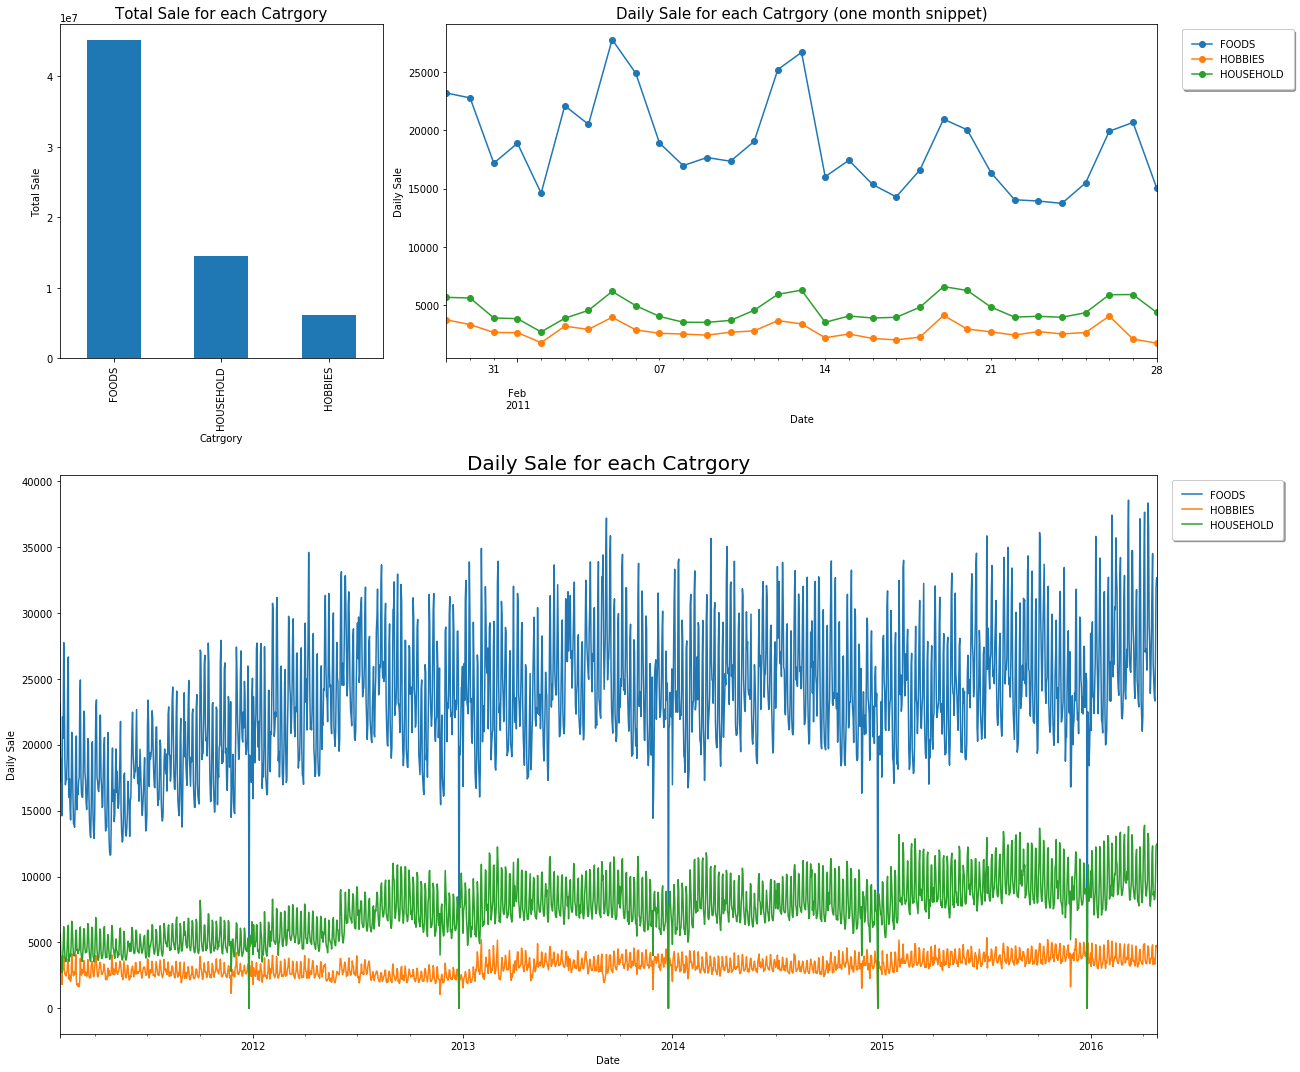

In [21]:
daily_sale_plot(total_daily_sale_category, label='Catrgory')

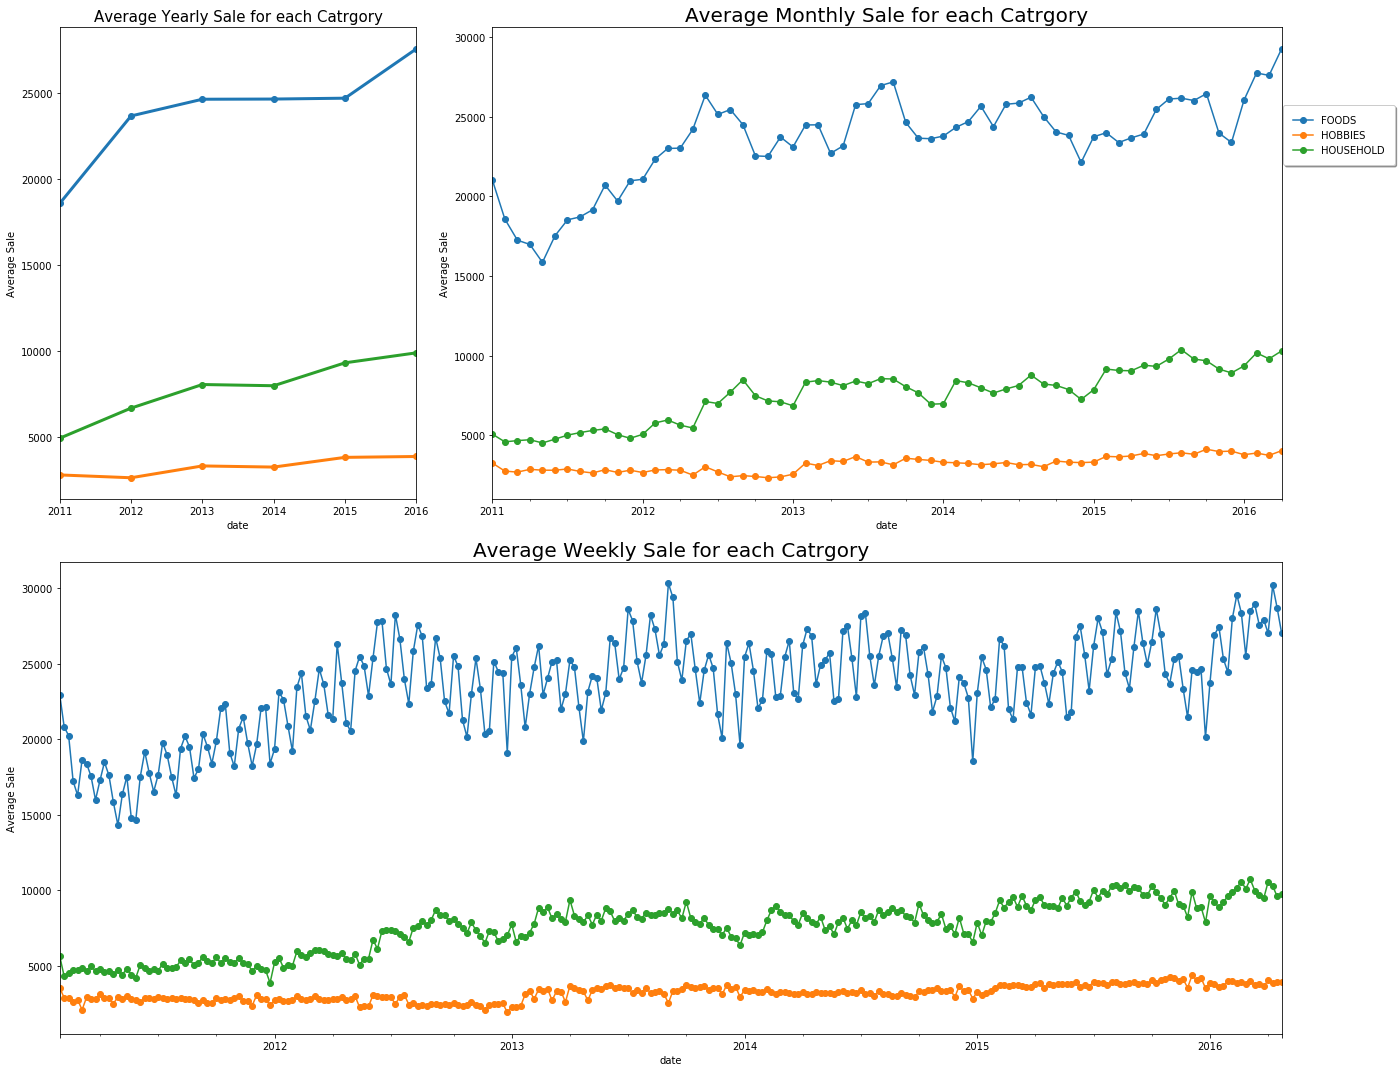

In [22]:
average_sale_plot(total_daily_sale_category, label='Catrgory')

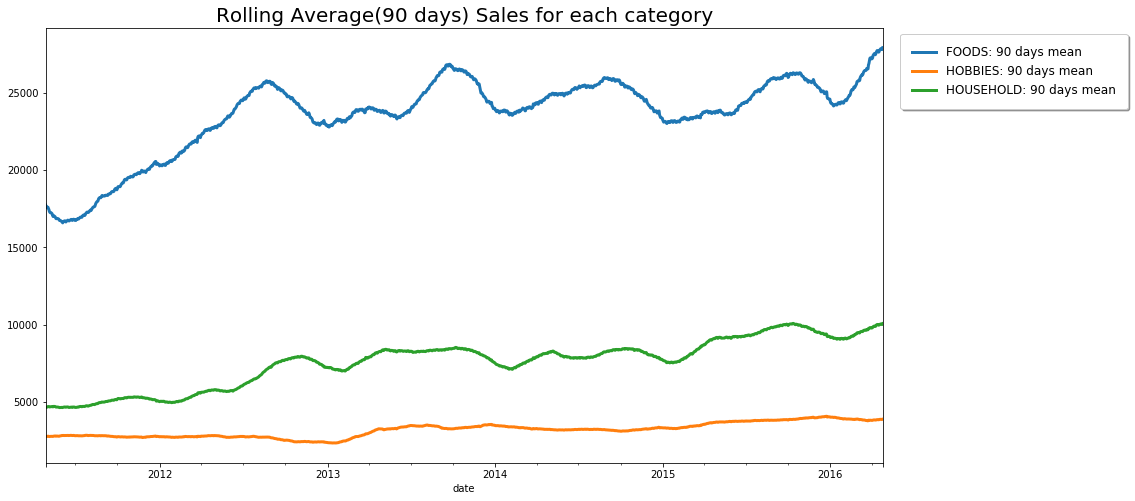

In [23]:
rolling_average_plot(total_daily_sale_category, label='Catrgory')

## Group - Department

In [24]:
featurelist = create_feature_list('dept_id')
total_daily_sale_dept = groupby_sale('dept_id', featurelist)

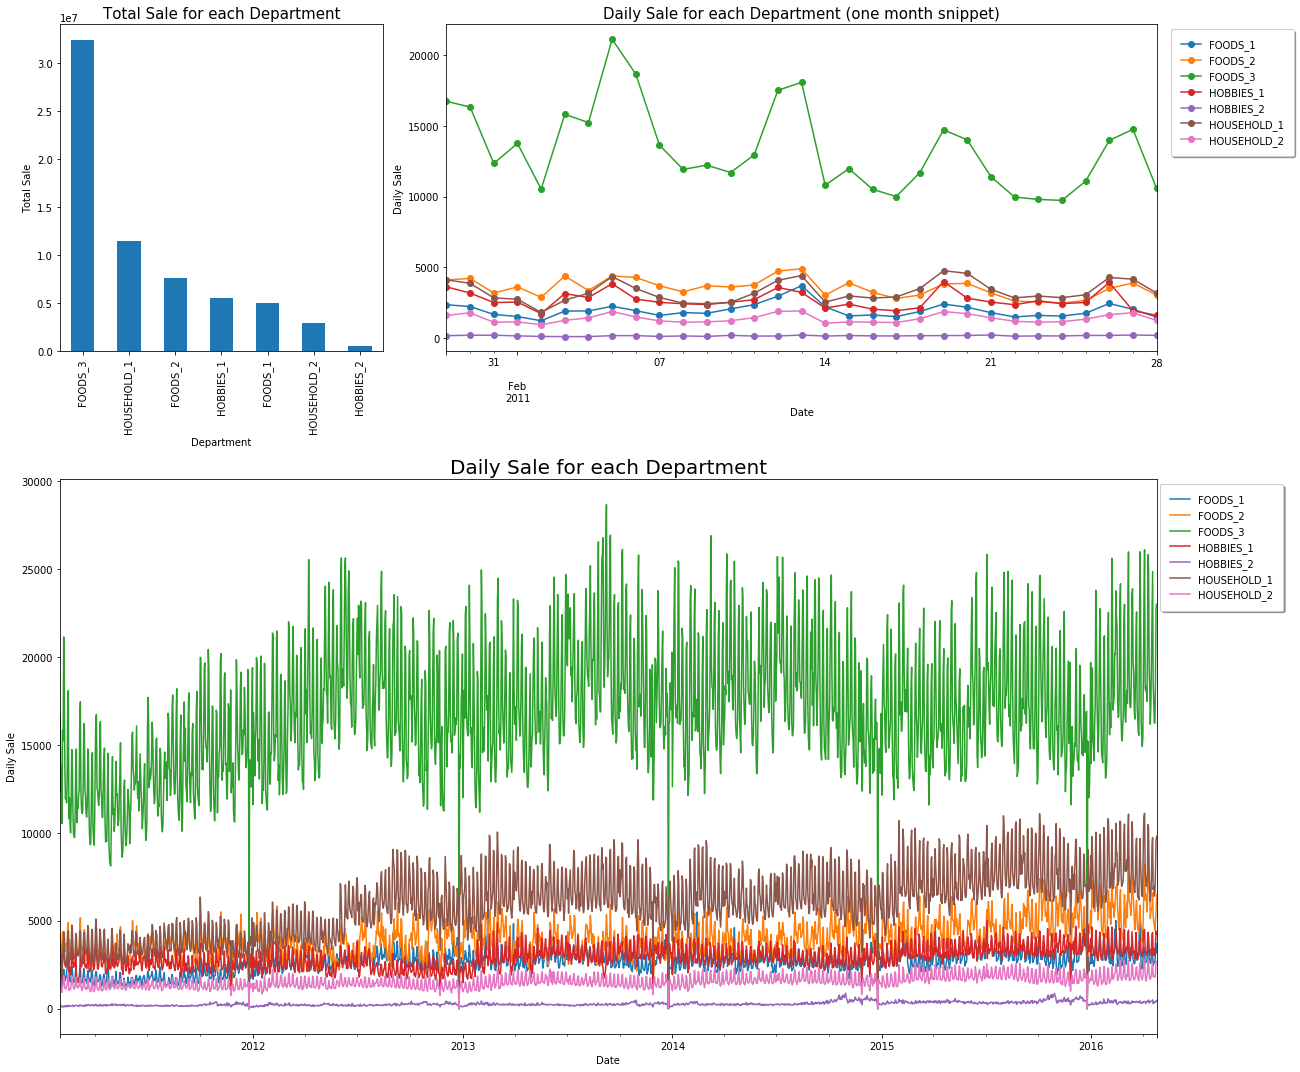

In [25]:
daily_sale_plot(total_daily_sale_dept, label='Department')

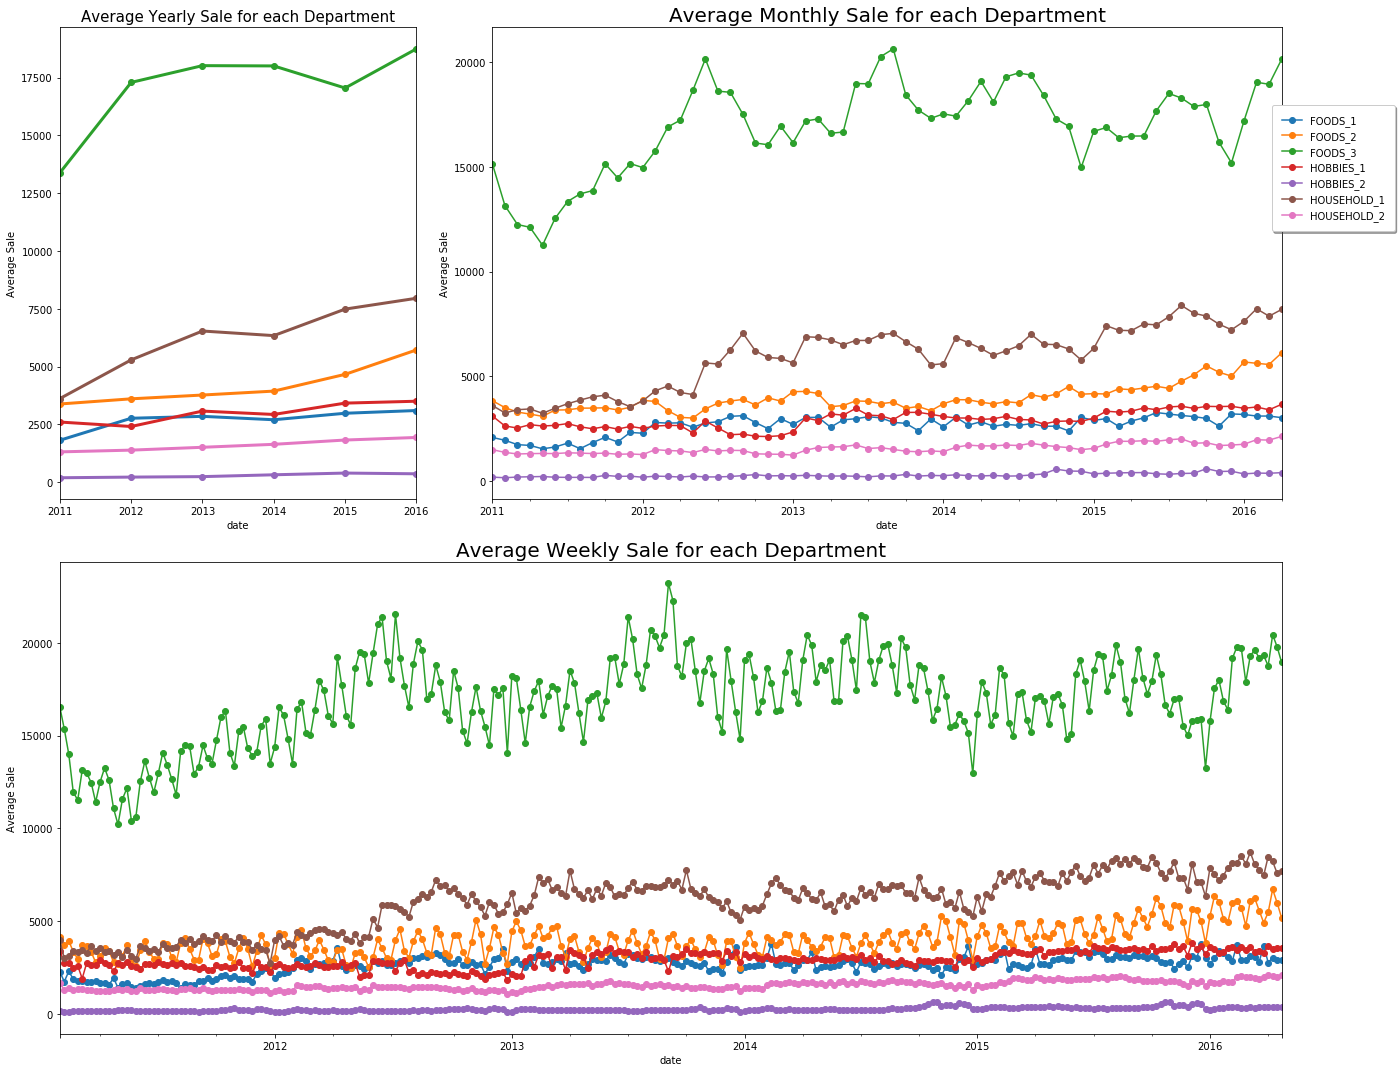

In [26]:
average_sale_plot(total_daily_sale_dept, label='Department')

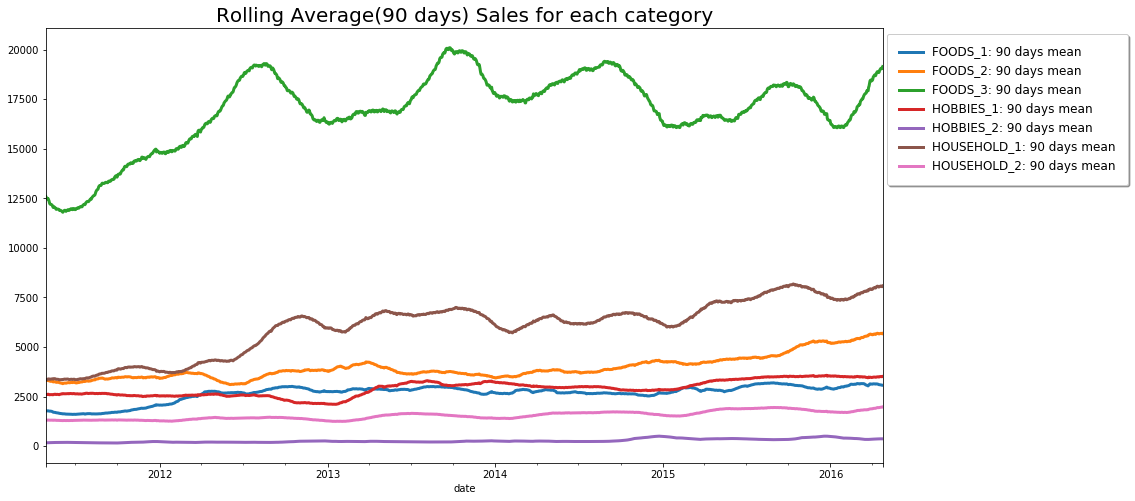

In [27]:
rolling_average_plot(total_daily_sale_dept, label='Department')

## Group - Store

In [28]:
featurelist = create_feature_list('store_id')
total_daily_sale_store = groupby_sale('store_id', featurelist)

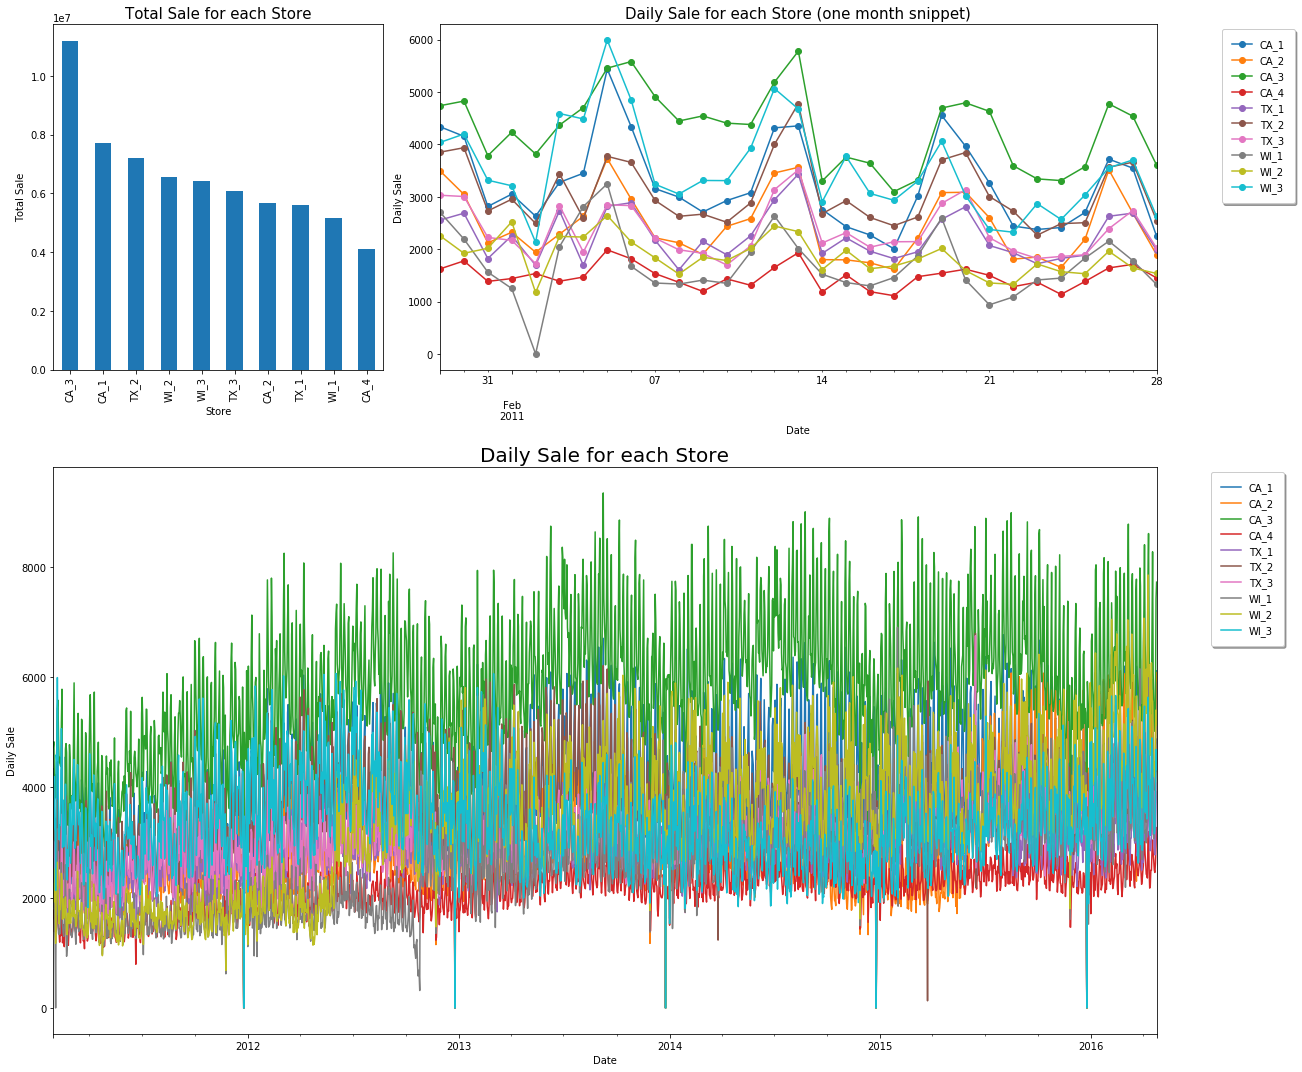

In [29]:
daily_sale_plot(total_daily_sale_store, label='Store')

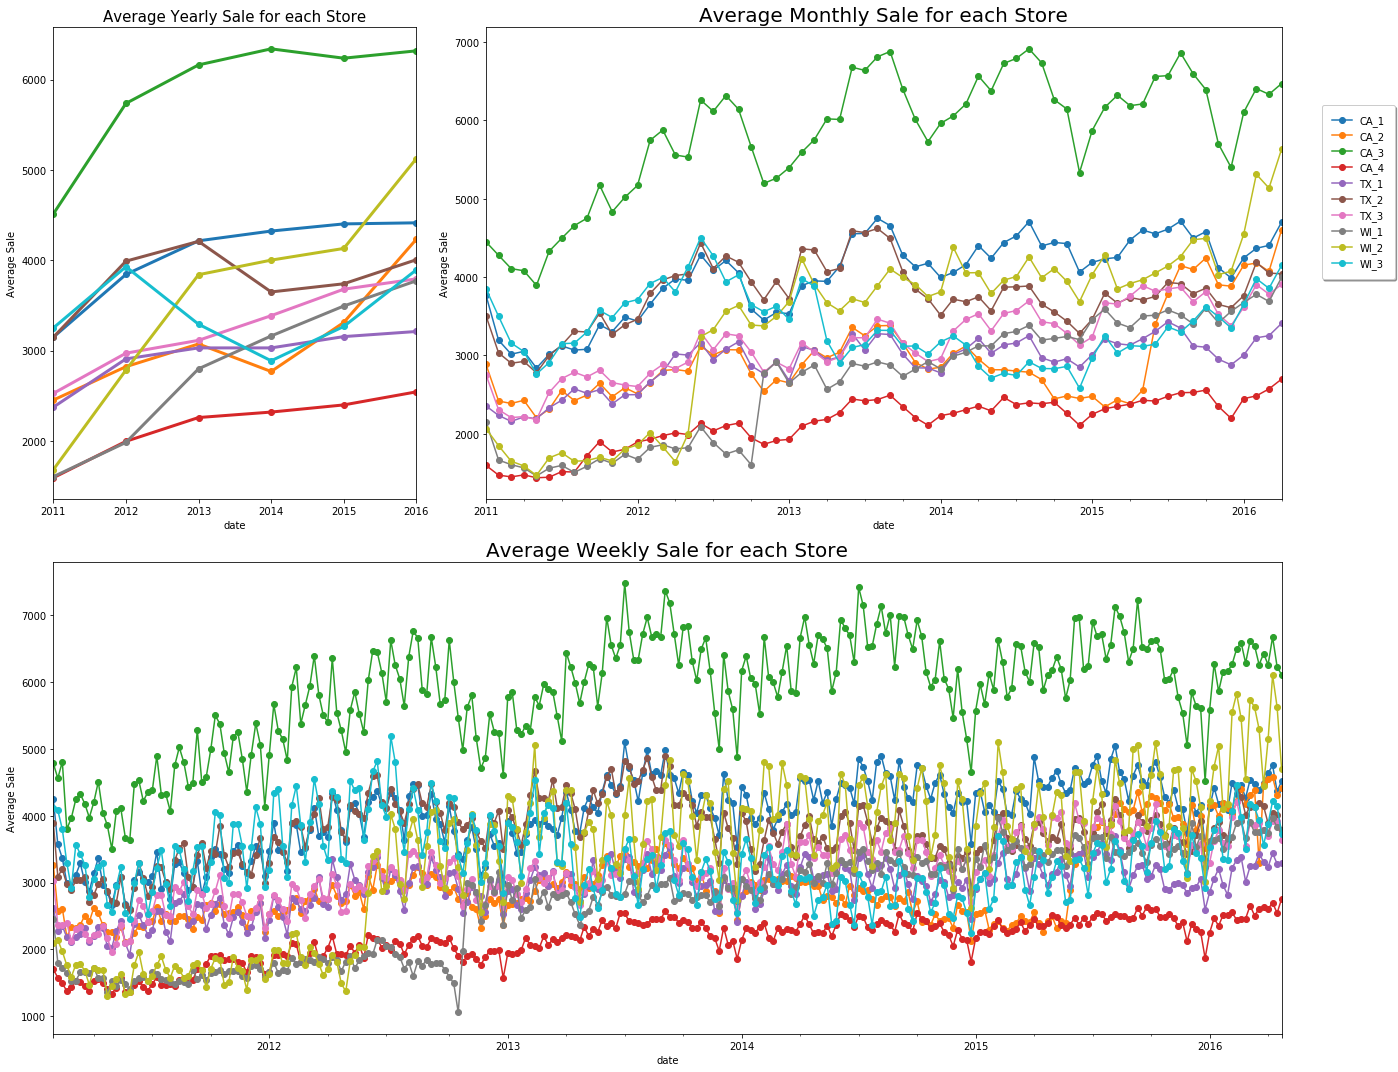

In [30]:
average_sale_plot(total_daily_sale_store, label='Store')

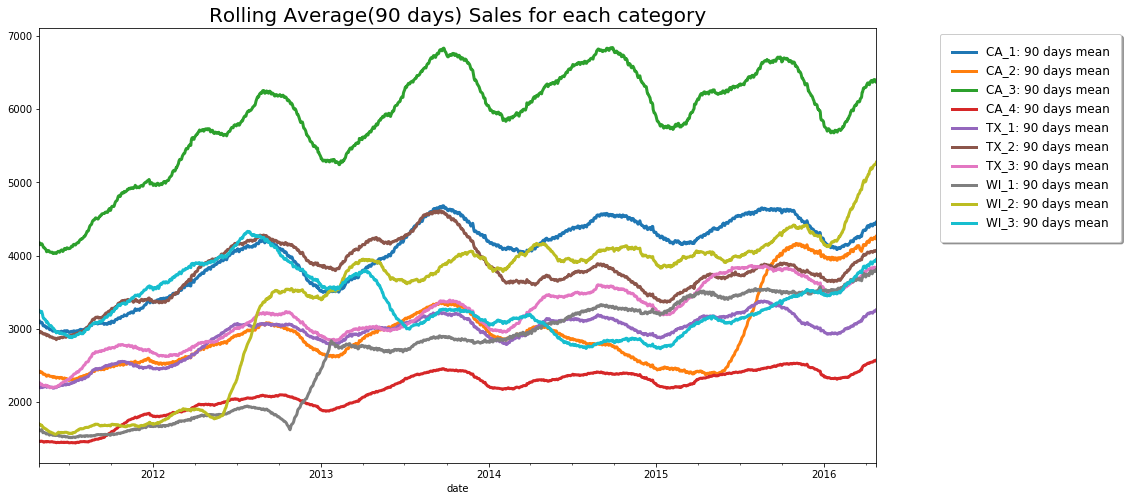

In [31]:
rolling_average_plot(total_daily_sale_store, label='Store')

# Sell Prices Data Visualization

In [32]:
sell_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
store_id      object
item_id       object
wm_yr_wk      int64
sell_price    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


In [33]:
sell_prices.head(2)

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58


In [34]:
sell_prices_merged = sell_prices.merge(calendar[['date','wm_yr_wk']],on='wm_yr_wk')\
                                .sort_values(by=['date','wm_yr_wk','item_id','store_id'])
sell_prices_merged.set_index('date',inplace=True)

sell_price_per_store = pd.DataFrame(index = calendar['date'],columns=sell_prices_merged['store_id'].unique())

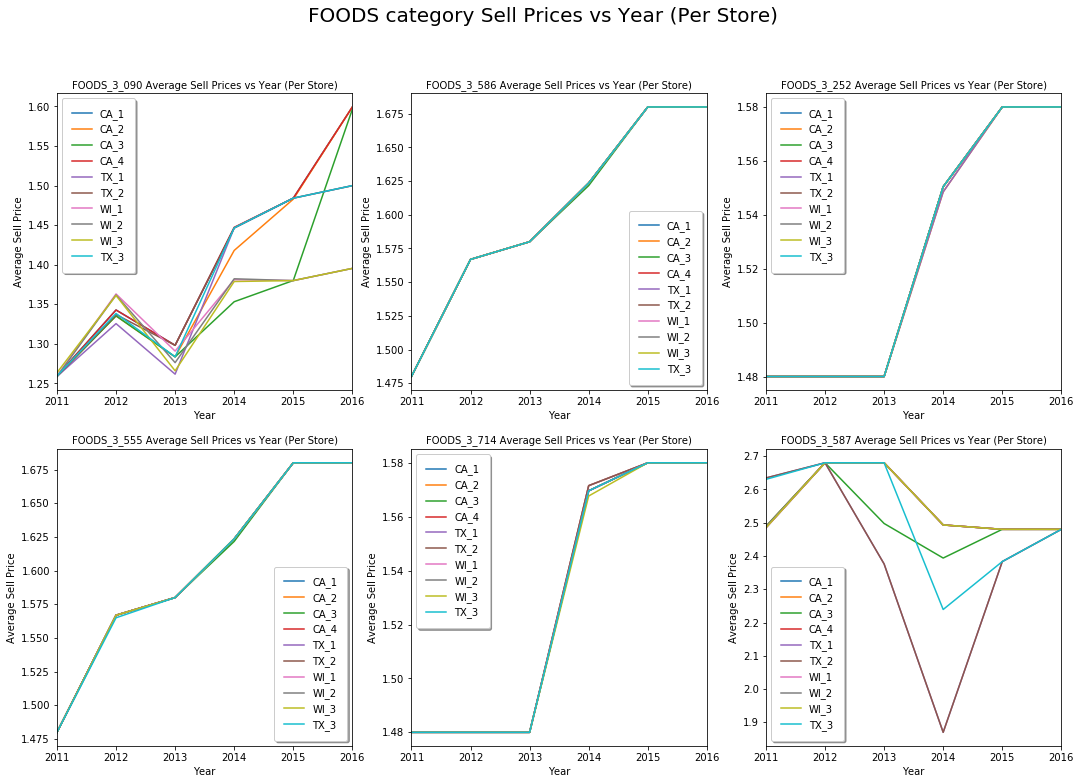

In [35]:
sell_prices_plot(cat='FOODS')

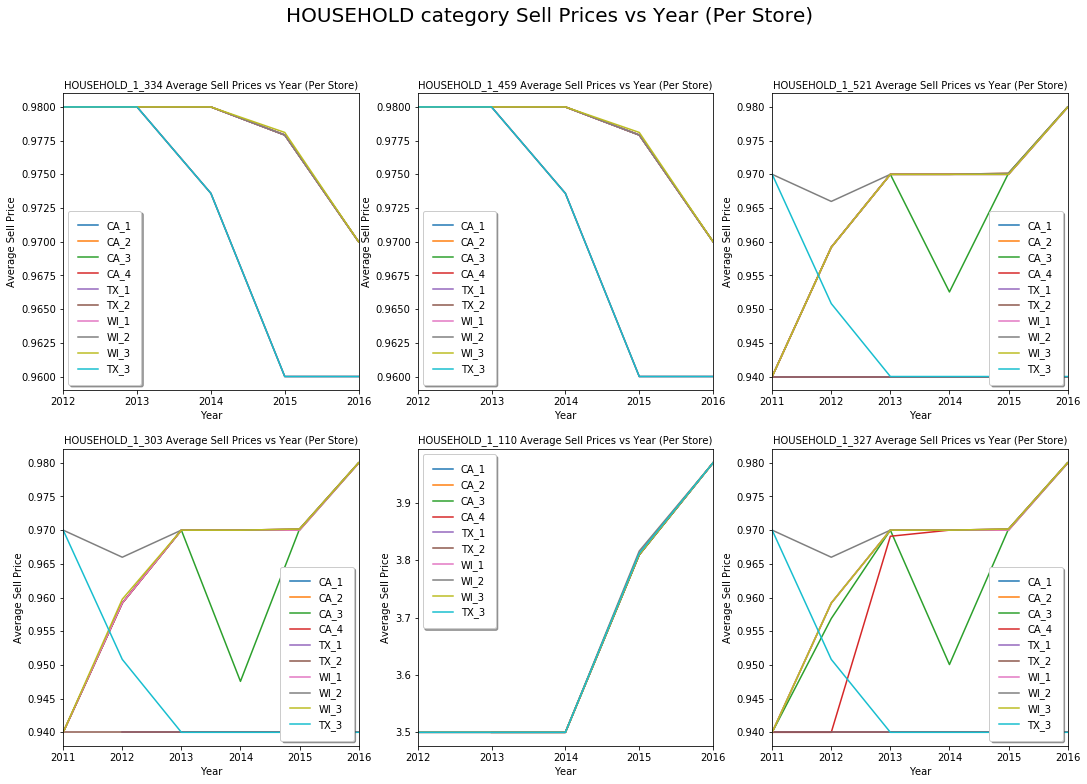

In [36]:
sell_prices_plot(cat='HOUSEHOLD')